In [1]:
import numpy as np
import tcbench as tcb
from functions import (extract_results_exclude, 
                       plot_results_per_excluded_class)

In [2]:
vectors_baseline = np.load('artifacts-mirage19/baseline_vectors.npy')
labels_baseline = np.load('artifacts-mirage19/baseline_labels.npy')
vectors_embeddings = np.load('artifacts-mirage19/embeddings_vectors.npy')
labels_embeddings = np.load('artifacts-mirage19/embeddings_labels.npy')

In [3]:
df_split = tcb.load_parquet(tcb.DATASETS.MIRAGE19, min_pkts=10, split=True)
train_val_indices = np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]])
test_indices = df_split.iloc[0][2]

In [4]:
samples = [10, 100, 1000]

distances_baseline = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
distances_embeddings = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
similarities = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
                0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

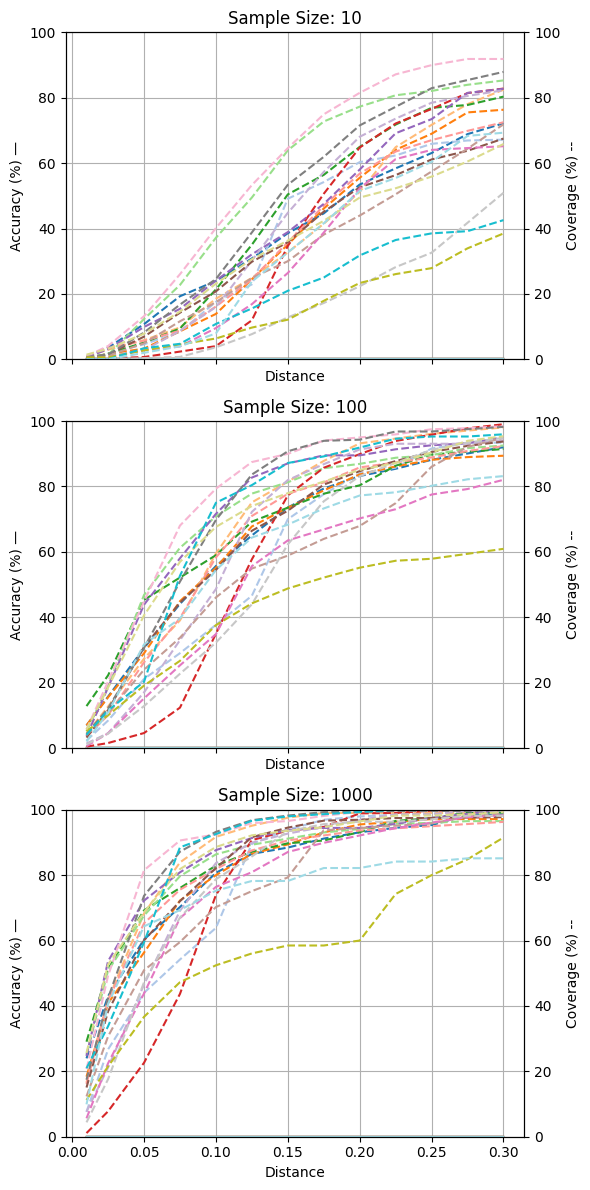

In [5]:
coverage_results_baseline_exclude, accuracy_results_baseline_exclude = extract_results_exclude(vectors_baseline, labels_baseline, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_baseline, num_classes=20)
plot_results_per_excluded_class(coverage_results_baseline_exclude, accuracy_results_baseline_exclude, samples, distances_baseline)

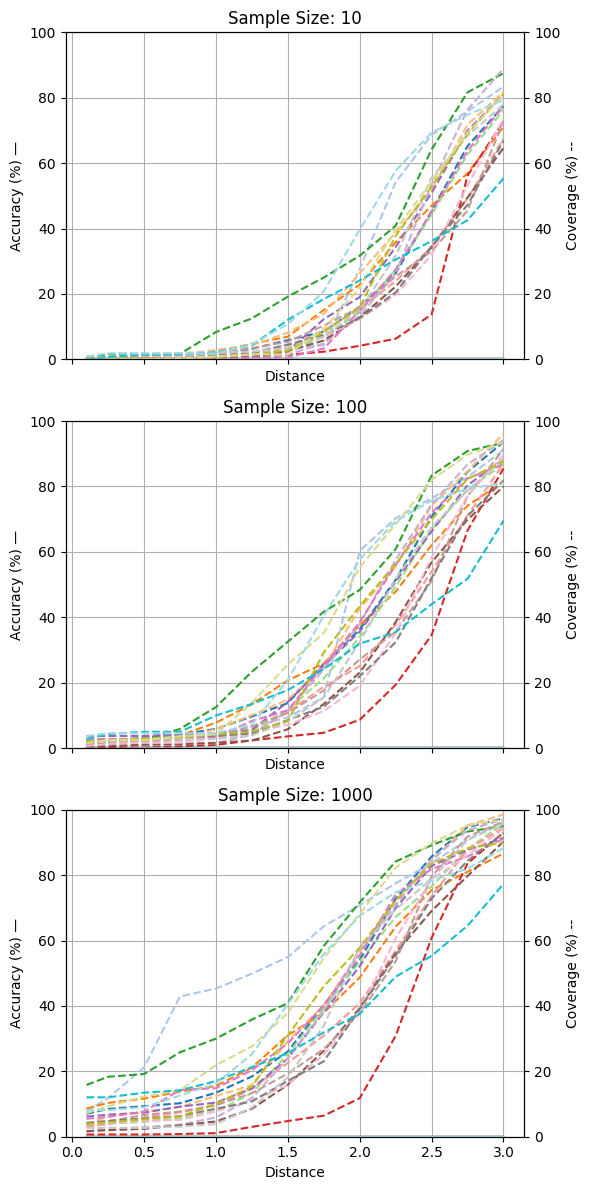

In [6]:
coverage_results_embeddings_exclude, accuracy_results_embeddings_exclude = extract_results_exclude(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_embeddings, num_classes=20)
plot_results_per_excluded_class(coverage_results_embeddings_exclude, accuracy_results_embeddings_exclude, samples, distances_embeddings)

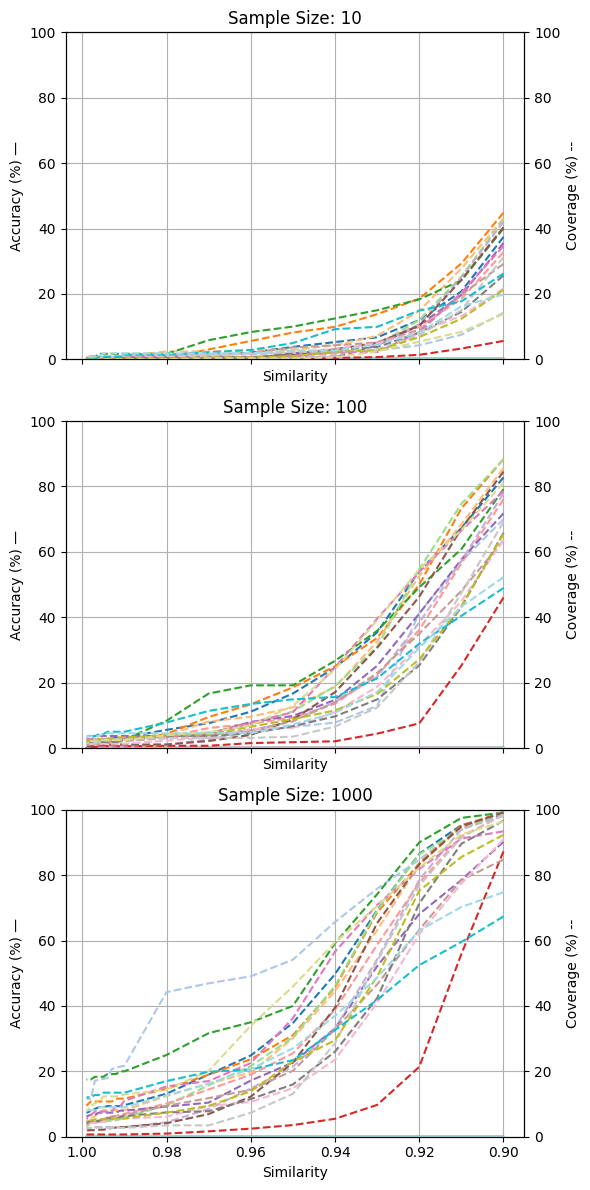

In [7]:
coverage_results_embeddings_cosine_exclude, accuracy_results_embeddings_cosine_exclude = extract_results_exclude(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'cosine', 'similarity', samples, similarities, num_classes=20)
plot_results_per_excluded_class(coverage_results_embeddings_cosine_exclude, accuracy_results_embeddings_cosine_exclude, samples, similarities, reverse=True)